In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import distplot
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
%matplotlib inline 
from sklearn.datasets import make_friedman1
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from statistics import median
import statsmodels.api as sm
from sklearn.model_selection import cross_val_score

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
Boston = pd.DataFrame(boston.data, columns=boston.feature_names)
Boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
Boston.isnull().sum() #To_check_the_missing_values_in_the_dataset

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

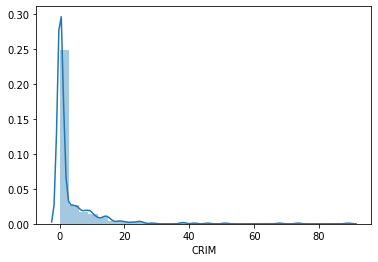

In [5]:
sns.distplot(Boston['CRIM'], bins=30)
plt.show()

In [6]:
x=Boston[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD','TAX', 'PTRATIO', 'B', 'LSTAT']]  #correlation_matrix
corr = x.corr()
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


In [7]:
X = pd.DataFrame(np.c_[Boston['ZN']], columns = ['ZN'])
Y = Boston['CRIM']

In [8]:
linreg1 = LinearRegression()
linreg1.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
print('linear model coeff (w): {}'
     .format(linreg1.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg1.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg1.score(X,Y)))

linear model coeff (w): [-0.07393498]
linear model intercept (b): 4.454
R-squared score (training): 0.040


In [10]:
x = pd.DataFrame(np.c_[Boston['ZN']], columns = ['ZN'])
Y = Boston['CRIM']
X = x.iloc[:].values
y = Y.iloc[:].values
X_with_const=sm.add_constant(X)
model=sm.OLS(endog=y,exog=X_with_const)
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     21.10
Date:                Sat, 18 Apr 2020   Prob (F-statistic):           5.51e-06
Time:                        18:28:06   Log-Likelihood:                -1796.0
No. Observations:                 506   AIC:                             3596.
Df Residuals:                     504   BIC:                             3604.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4537      0.417     10.675      0.000       3.634       5.273
x1            -0.0739      0.016     -4.594      0.000      -0.106      -0.042
==============================================================================
Omnibus:                      567.443   Durbin-Watson:                   0.857
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            32753.004
Skew:                           5.257   Prob(JB):                         0.00
Kurtosis:                      40.986   Cond. No.                         28.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

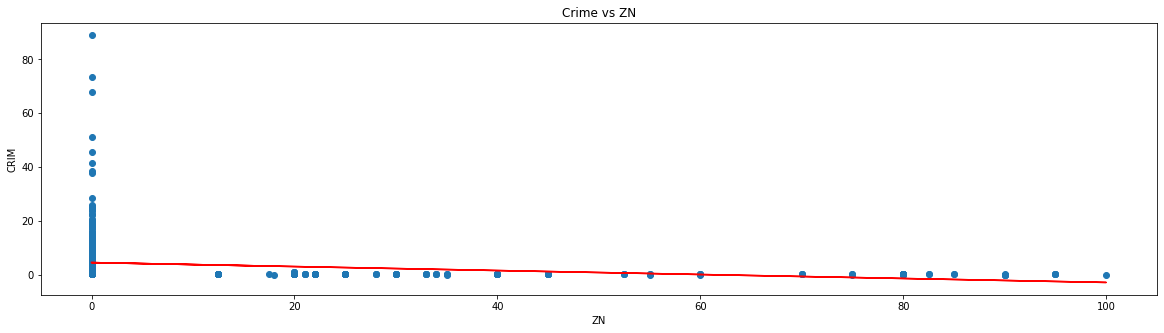

In [11]:
plt.figure(figsize=(20, 5))

features = ['ZN']
target = Boston['CRIM']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
x = Boston[col]
y = target
plt.scatter(x, y, marker='o')
plt.title('Crime vs ZN')
plt.xlabel(col)
plt.ylabel('CRIM')
plt.plot(X, linreg1.coef_ * X + linreg1.intercept_, 'r-')

In [12]:
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

In [13]:
linreg = LinearRegression().fit(X_poly, Y)

print('(poly deg 3) linear model coeff (w):\n{}'
     .format(linreg.coef_))
print('(poly deg 3) linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('(poly deg 3) R-squared score (training): {:.3f}'
     .format(linreg.score(X_poly, Y)))

(poly deg 3) linear model coeff (w):
[ 0.00000000e+00 -3.32188415e-01  6.48263365e-03 -3.77579253e-05]
(poly deg 3) linear model intercept (b): 4.846
(poly deg 3) R-squared score (training): 0.058


In [14]:
X_dataset=pd.DataFrame(np.c_[Boston['ZN']], columns = ['ZN'])
y_dataset=Boston['CRIM']
X=X_dataset.iloc[:].values
y=y_dataset.iloc[:].values
import statsmodels.api as sm
poly = PolynomialFeatures(degree=3)
X_F1_poly = poly.fit_transform(X_dataset)
X_with_const=sm.add_constant(X_poly)
model=sm.OLS(endog=y,exog=X_with_const)
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     10.35
Date:                Sat, 18 Apr 2020   Prob (F-statistic):           1.28e-06
Time:                        18:28:07   Log-Likelihood:                -1791.2
No. Observations:                 506   AIC:                             3590.
Df Residuals:                     502   BIC:                             3607.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8461      0.433     11.192      0.000       3.995       5.697
x1            -0.3322      0.110     -3.025      0.003      -0.548      -0.116
x2             0.0065      0.004      1.679      0.094      -0.001       0.014
x3         -3.776e-05   3.14e-05     -1.203      0.230   -9.94e-05    2.39e-05
==============================================================================
Omnibus:                      569.133   Durbin-Watson:                   0.875
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            33700.991
Skew:                           5.272   Prob(JB):                         0.00
Kurtosis:                      41.565   Cond. No.                     1.89e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
X = pd.DataFrame(np.c_[Boston['INDUS']], columns = ['INDUS'])
Y = Boston['CRIM']
linreg2 = LinearRegression()
linreg2.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
print('linear model coeff (w): {}'
     .format(linreg2.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg2.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg2.score(X,Y)))

linear model coeff (w): [0.50977633]
linear model intercept (b): -2.064
R-squared score (training): 0.165


In [17]:
x = pd.DataFrame(np.c_[Boston['INDUS']], columns = ['INDUS'])
Y = Boston['CRIM']
X = x.iloc[:].values
y = Y.iloc[:].values
X_with_const=sm.add_constant(X)
model=sm.OLS(endog=y,exog=X_with_const)
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     99.82
Date:                Sat, 18 Apr 2020   Prob (F-statistic):           1.45e-21
Time:                        18:28:07   Log-Likelihood:                -1760.6
No. Observations:                 506   AIC:                             3525.
Df Residuals:                     504   BIC:                             3534.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.0637      0.667     -3.093      0.002      -3.375      -0.753
x1             0.5098      0.051      9.991      0.000       0.410       0.610
==============================================================================
Omnibus:                      585.118   Durbin-Watson:                   0.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            41418.938
Skew:                           5.449   Prob(JB):                         0.00
Kurtosis:                      45.962   Cond. No.                         25.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

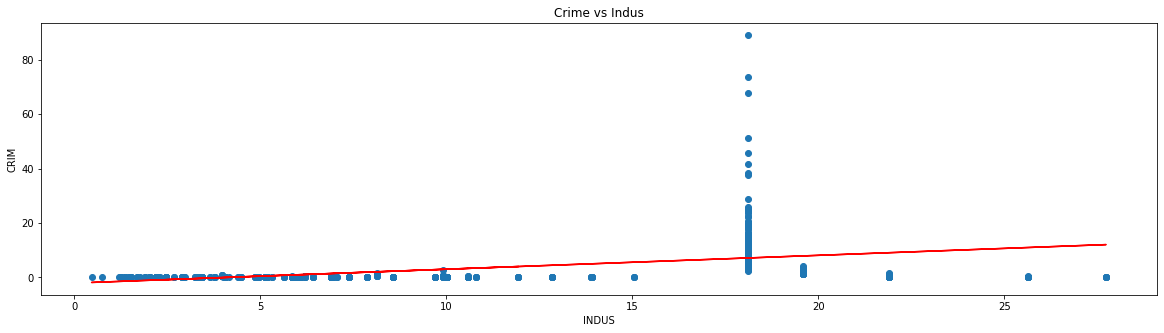

In [18]:
plt.figure(figsize=(20, 5))

features = ['INDUS']
target = Boston['CRIM']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
x = Boston[col]
y = target
plt.scatter(x, y, marker='o')
plt.title('Crime vs Indus')
plt.xlabel(col)
plt.ylabel('CRIM')
plt.plot(X, linreg2.coef_ * X + linreg2.intercept_, 'r-')

In [19]:
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

In [20]:
linreg = LinearRegression().fit(X_poly, Y)

print('(poly deg 3) linear model coeff (w):\n{}'
     .format(linreg.coef_))
print('(poly deg 3) linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('(poly deg 3) R-squared score (training): {:.3f}'
     .format(linreg.score(X_poly, Y)))

(poly deg 3) linear model coeff (w):
[ 0.         -1.96521293  0.2519373  -0.00697601]
(poly deg 3) linear model intercept (b): 3.663
(poly deg 3) R-squared score (training): 0.260


In [21]:
X_dataset=pd.DataFrame(np.c_[Boston['INDUS']], columns = ['INDUS'])
y_dataset=Boston['CRIM']
X=X_dataset.iloc[:].values
y=y_dataset.iloc[:].values
import statsmodels.api as sm
poly = PolynomialFeatures(degree=3)
X_F1_poly = poly.fit_transform(X_dataset)
X_with_const=sm.add_constant(X_poly)
model=sm.OLS(endog=y,exog=X_with_const)
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.260
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     58.69
Date:                Sat, 18 Apr 2020   Prob (F-statistic):           1.55e-32
Time:                        18:28:08   Log-Likelihood:                -1730.3
No. Observations:                 506   AIC:                             3469.
Df Residuals:                     502   BIC:                             3486.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.6626      1.574      2.327      0.020       0.570       6.755
x1            -1.9652      0.482     -4.077      0.000      -2.912      -1.018
x2             0.2519      0.039      6.407      0.000       0.175       0.329
x3            -0.0070      0.001     -7.292      0.000      -0.009      -0.005
==============================================================================
Omnibus:                      611.788   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            51742.286
Skew:                           5.820   Prob(JB):                         0.00
Kurtosis:                      51.153   Cond. No.                     2.47e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
X = pd.DataFrame(np.c_[Boston['CHAS']], columns = ['CHAS'])
Y = Boston['CRIM']
linreg3 = LinearRegression()
linreg3.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
print('linear model coeff (w): {}'
     .format(linreg3.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg3.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg3.score(X,Y)))

linear model coeff (w): [-1.89277655]
linear model intercept (b): 3.744
R-squared score (training): 0.003


In [24]:
x = pd.DataFrame(np.c_[Boston['CHAS']], columns = ['CHAS'])
Y = Boston['CRIM']
X = x.iloc[:].values
y = Y.iloc[:].values
X_with_const=sm.add_constant(X)
model=sm.OLS(endog=y,exog=X_with_const)
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.579
Date:                Sat, 18 Apr 2020   Prob (F-statistic):              0.209
Time:                        18:28:08   Log-Likelihood:                -1805.6
No. Observations:                 506   AIC:                             3615.
Df Residuals:                     504   BIC:                             3624.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.7444      0.396      9.453      0.000       2.966       4.523
x1            -1.8928      1.506     -1.257      0.209      -4.852       1.066
==============================================================================
Omnibus:                      561.663   Durbin-Watson:                   0.817
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            30645.429
Skew:                           5.191   Prob(JB):                         0.00
Kurtosis:                      39.685   Cond. No.                         3.96
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

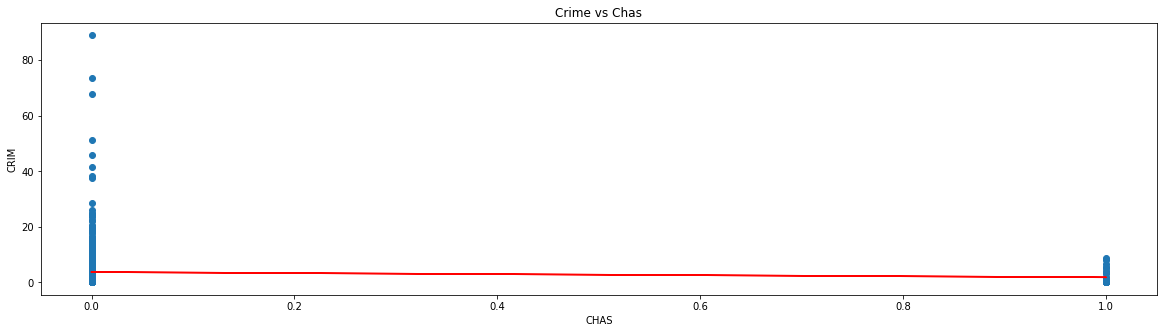

In [25]:
plt.figure(figsize=(20, 5))

features = ['CHAS']
target = Boston['CRIM']
for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
x = Boston[col]
y = target
plt.scatter(x, y, marker='o')
plt.title('Crime vs Chas')
plt.xlabel(col)
plt.ylabel('CRIM')
plt.plot(X, linreg3.coef_ * X + linreg3.intercept_, 'r-')

In [26]:
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)
linreg = LinearRegression().fit(X_poly, Y)

print('(poly deg 3) linear model coeff (w):\n{}'
     .format(linreg.coef_))
print('(poly deg 3) linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('(poly deg 3) R-squared score (training): {:.3f}'
     .format(linreg.score(X_poly, Y)))

(poly deg 3) linear model coeff (w):
[ 0.         -0.63092552 -0.63092552 -0.63092552]
(poly deg 3) linear model intercept (b): 3.744
(poly deg 3) R-squared score (training): 0.003


In [27]:
X_dataset=pd.DataFrame(np.c_[Boston['CHAS']], columns = ['CHAS'])
y_dataset=Boston['CRIM']
X=X_dataset.iloc[:].values
y=y_dataset.iloc[:].values
import statsmodels.api as sm
poly = PolynomialFeatures(degree=3)
X_F1_poly = poly.fit_transform(X_dataset)
X_with_const=sm.add_constant(X_poly)
model=sm.OLS(endog=y,exog=X_with_const)
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.579
Date:                Sat, 18 Apr 2020   Prob (F-statistic):              0.209
Time:                        18:28:08   Log-Likelihood:                -1805.6
No. Observations:                 506   AIC:                             3615.
Df Residuals:                     504   BIC:                             3624.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.7444      0.396      9.453      0.000       2.966       4.523
x1            -0.6309      0.502     -1.257      0.209      -1.617       0.355
x2            -0.6309      0.502     -1.257      0.209      -1.617       0.355
x3            -0.6309      0.502     -1.257      0.209      -1.617       0.355
==============================================================================
Omnibus:                      561.663   Durbin-Watson:                   0.817
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            30645.429
Skew:                           5.191   Prob(JB):                         0.00
Kurtosis:                      39.685   Cond. No.                     3.42e+32
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.39e-63. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [28]:
X = pd.DataFrame(np.c_[Boston['NOX']], columns = ['NOX'])
Y = Boston['CRIM']
linreg4 = LinearRegression()
linreg4.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
print('linear model coeff (w): {}'
     .format(linreg4.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg4.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg4.score(X,Y)))

linear model coeff (w): [31.2485312]
linear model intercept (b): -13.720
R-squared score (training): 0.177


In [30]:
x = pd.DataFrame(np.c_[Boston['NOX']], columns = ['NOX'])
Y = Boston['CRIM']
X = x.iloc[:].values
y = Y.iloc[:].values
X_with_const=sm.add_constant(X)
model=sm.OLS(endog=y,exog=X_with_const)
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     108.6
Date:                Sat, 18 Apr 2020   Prob (F-statistic):           3.75e-23
Time:                        18:28:08   Log-Likelihood:                -1757.0
No. Observations:                 506   AIC:                             3518.
Df Residuals:                     504   BIC:                             3526.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -13.7199      1.699     -8.073      0.000     -17.059     -10.381
x1            31.2485      2.999     10.419      0.000      25.356      37.141
==============================================================================
Omnibus:                      591.712   Durbin-Watson:                   0.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            43138.106
Skew:                           5.546   Prob(JB):                         0.00
Kurtosis:                      46.852   Cond. No.                         11.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

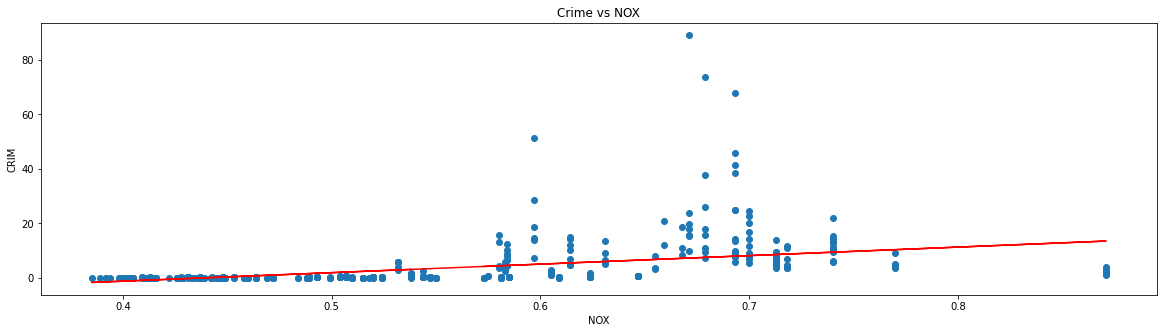

In [31]:
plt.figure(figsize=(20, 5))

features = ['NOX']
target = Boston['CRIM']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
x = Boston[col]
y = target
plt.scatter(x, y, marker='o')
plt.title('Crime vs NOX')
plt.xlabel(col)
plt.ylabel('CRIM')
plt.plot(X, linreg4.coef_ * X + linreg4.intercept_, 'r-')

In [32]:
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)
linreg = LinearRegression().fit(X_poly, Y)

print('(poly deg 3) linear model coeff (w):\n{}'
     .format(linreg.coef_))
print('(poly deg 3) linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('(poly deg 3) R-squared score (training): {:.3f}'
     .format(linreg.score(X_poly, Y)))

(poly deg 3) linear model coeff (w):
[    0.         -1279.37125166  2248.54405256 -1245.70287375]
(poly deg 3) linear model intercept (b): 233.087
(poly deg 3) R-squared score (training): 0.297


In [33]:
X_dataset=pd.DataFrame(np.c_[Boston['NOX']], columns = ['NOX'])
y_dataset=Boston['CRIM']
X=X_dataset.iloc[:].values
y=y_dataset.iloc[:].values
import statsmodels.api as sm
poly = PolynomialFeatures(degree=3)
X_F1_poly = poly.fit_transform(X_dataset)
X_with_const=sm.add_constant(X_poly)
model=sm.OLS(endog=y,exog=X_with_const)
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.297
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     70.69
Date:                Sat, 18 Apr 2020   Prob (F-statistic):           3.81e-38
Time:                        18:28:09   Log-Likelihood:                -1717.2
No. Observations:                 506   AIC:                             3442.
Df Residuals:                     502   BIC:                             3459.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        233.0866     33.643      6.928      0.000     166.988     299.185
x1         -1279.3713    170.397     -7.508      0.000   -1614.151    -944.591
x2          2248.5441    279.899      8.033      0.000    1698.626    2798.462
x3         -1245.7029    149.282     -8.345      0.000   -1538.997    -952.409
==============================================================================
Omnibus:                      614.412   Durbin-Watson:                   1.159
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            53523.997
Skew:                           5.851   Prob(JB):                         0.00
Kurtosis:                      52.008   Cond. No.                     1.36e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.36e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
X = pd.DataFrame(np.c_[Boston['RM']], columns = ['RM'])
Y = Boston['CRIM']
linreg5 = LinearRegression()
linreg5.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
print('linear model coeff (w): {}'
     .format(linreg5.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg5.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg5.score(X,Y)))

linear model coeff (w): [-2.68405122]
linear model intercept (b): 20.482
R-squared score (training): 0.048


In [36]:
x = pd.DataFrame(np.c_[Boston['RM']], columns = ['RM'])
Y = Boston['CRIM']
X = x.iloc[:].values
y = Y.iloc[:].values
X_with_const=sm.add_constant(X)
model=sm.OLS(endog=y,exog=X_with_const)
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     25.45
Date:                Sat, 18 Apr 2020   Prob (F-statistic):           6.35e-07
Time:                        18:28:09   Log-Likelihood:                -1793.9
No. Observations:                 506   AIC:                             3592.
Df Residuals:                     504   BIC:                             3600.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.4818      3.364      6.088      0.000      13.872      27.092
x1            -2.6841      0.532     -5.045      0.000      -3.729      -1.639
==============================================================================
Omnibus:                      575.717   Durbin-Watson:                   0.879
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            36658.093
Skew:                           5.345   Prob(JB):                         0.00
Kurtosis:                      43.305   Cond. No.                         58.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

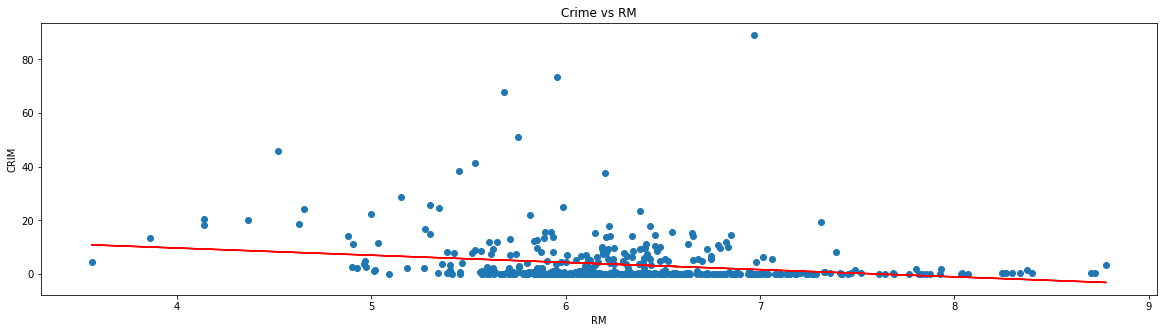

In [37]:
plt.figure(figsize=(20, 5))

features = ['RM']
target = Boston['CRIM']
for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
x = Boston[col]
y = target
plt.scatter(x, y, marker='o')
plt.title('Crime vs RM')
plt.xlabel(col)
plt.ylabel('CRIM')
plt.plot(X, linreg5.coef_ * X + linreg5.intercept_, 'r-')

In [38]:
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)
linreg = LinearRegression().fit(X_poly, Y)

print('(poly deg 3) linear model coeff (w):\n{}'
     .format(linreg.coef_))
print('(poly deg 3) linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('(poly deg 3) R-squared score (training): {:.3f}'
     .format(linreg.score(X_poly, Y)))

(poly deg 3) linear model coeff (w):
[  0.         -39.15013634   4.55089591  -0.17447695]
(poly deg 3) linear model intercept (b): 112.625
(poly deg 3) R-squared score (training): 0.068


In [39]:
X_dataset=pd.DataFrame(np.c_[Boston['RM']], columns = ['RM'])
y_dataset=Boston['CRIM']
X=X_dataset.iloc[:].values
y=y_dataset.iloc[:].values
import statsmodels.api as sm
poly = PolynomialFeatures(degree=3)
X_F1_poly = poly.fit_transform(X_dataset)
X_with_const=sm.add_constant(X_poly)
model=sm.OLS(endog=y,exog=X_with_const)
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     12.17
Date:                Sat, 18 Apr 2020   Prob (F-statistic):           1.07e-07
Time:                        18:28:09   Log-Likelihood:                -1788.6
No. Observations:                 506   AIC:                             3585.
Df Residuals:                     502   BIC:                             3602.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        112.6246     64.517      1.746      0.081     -14.132     239.382
x1           -39.1501     31.311     -1.250      0.212    -100.668      22.368
x2             4.5509      5.010      0.908      0.364      -5.292      14.394
x3            -0.1745      0.264     -0.662      0.509      -0.693       0.344
==============================================================================
Omnibus:                      585.097   Durbin-Watson:                   0.913
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            40144.207
Skew:                           5.465   Prob(JB):                         0.00
Kurtosis:                      45.245   Cond. No.                     5.36e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.36e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
X = pd.DataFrame(np.c_[Boston['AGE']], columns = ['AGE'])
Y = Boston['CRIM']
linreg6 = LinearRegression()
linreg6.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
print('linear model coeff (w): {}'
     .format(linreg6.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg6.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg6.score(X,Y)))

linear model coeff (w): [0.10778623]
linear model intercept (b): -3.778
R-squared score (training): 0.124


In [42]:
x = pd.DataFrame(np.c_[Boston['AGE']], columns = ['AGE'])
Y = Boston['CRIM']
X = x.iloc[:].values
y = Y.iloc[:].values
X_with_const=sm.add_constant(X)
model=sm.OLS(endog=y,exog=X_with_const)
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     71.62
Date:                Sat, 18 Apr 2020   Prob (F-statistic):           2.85e-16
Time:                        18:28:09   Log-Likelihood:                -1772.7
No. Observations:                 506   AIC:                             3549.
Df Residuals:                     504   BIC:                             3558.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.7779      0.944     -4.002      0.000      -5.633      -1.923
x1             0.1078      0.013      8.463      0.000       0.083       0.133
==============================================================================
Omnibus:                      574.509   Durbin-Watson:                   0.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            36741.903
Skew:                           5.322   Prob(JB):                         0.00
Kurtosis:                      43.366   Cond. No.                         195.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

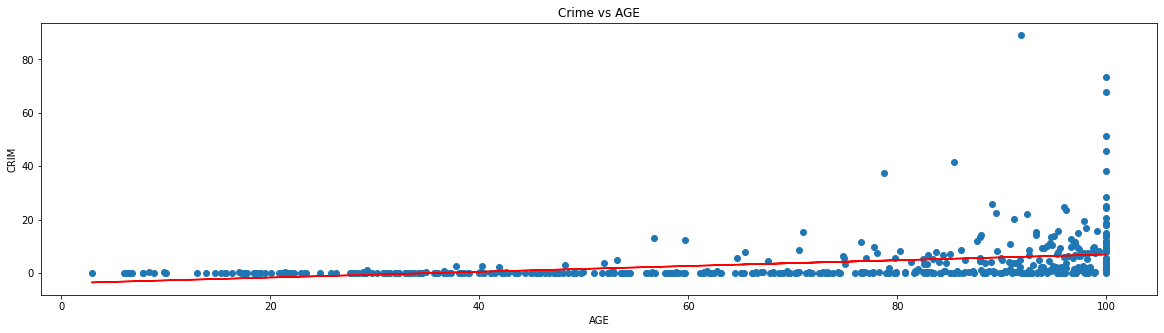

In [43]:
plt.figure(figsize=(20, 5))

features = ['AGE']
target = Boston['CRIM']
for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
x = Boston[col]
y = target
plt.scatter(x, y, marker='o')
plt.title('Crime vs AGE')
plt.xlabel(col)
plt.ylabel('CRIM')
plt.plot(X, linreg6.coef_ * X + linreg6.intercept_, 'r-')

In [44]:
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)
linreg = LinearRegression().fit(X_poly, Y)

print('(poly deg 3) linear model coeff (w):\n{}'
     .format(linreg.coef_))
print('(poly deg 3) linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('(poly deg 3) R-squared score (training): {:.3f}'
     .format(linreg.score(X_poly, Y)))

(poly deg 3) linear model coeff (w):
[ 0.00000000e+00  2.73653131e-01 -7.22959558e-03  5.74530704e-05]
(poly deg 3) linear model intercept (b): -2.549
(poly deg 3) R-squared score (training): 0.174


In [45]:
X_dataset=pd.DataFrame(np.c_[Boston['AGE']], columns = ['AGE'])
y_dataset=Boston['CRIM']
X=X_dataset.iloc[:].values
y=y_dataset.iloc[:].values
import statsmodels.api as sm
poly = PolynomialFeatures(degree=3)
X_F1_poly = poly.fit_transform(X_dataset)
X_with_const=sm.add_constant(X_poly)
model=sm.OLS(endog=y,exog=X_with_const)
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.169
Method:                 Least Squares   F-statistic:                     35.31
Date:                Sat, 18 Apr 2020   Prob (F-statistic):           1.02e-20
Time:                        18:28:09   Log-Likelihood:                -1757.9
No. Observations:                 506   AIC:                             3524.
Df Residuals:                     502   BIC:                             3541.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.5488      2.769     -0.920      0.358      -7.989       2.892
x1             0.2737      0.186      1.468      0.143      -0.093       0.640
x2            -0.0072      0.004     -1.988      0.047      -0.014    -8.4e-05
x3          5.745e-05   2.11e-05      2.724      0.007     1.6e-05    9.89e-05
==============================================================================
Omnibus:                      577.477   Durbin-Watson:                   1.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            39586.670
Skew:                           5.336   Prob(JB):                         0.00
Kurtosis:                      44.997   Cond. No.                     4.74e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.74e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
X = pd.DataFrame(np.c_[Boston['DIS']], columns = ['DIS'])
Y = Boston['CRIM']
linreg7 = LinearRegression()
linreg7.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
print('linear model coeff (w): {}'
     .format(linreg7.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg7.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg7.score(X,Y)))

linear model coeff (w): [-1.55090168]
linear model intercept (b): 9.499
R-squared score (training): 0.144


In [48]:
x = pd.DataFrame(np.c_[Boston['DIS']], columns = ['DIS'])
Y = Boston['CRIM']
X = x.iloc[:].values
y = Y.iloc[:].values
X_with_const=sm.add_constant(X)
model=sm.OLS(endog=y,exog=X_with_const)
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     84.89
Date:                Sat, 18 Apr 2020   Prob (F-statistic):           8.52e-19
Time:                        18:28:10   Log-Likelihood:                -1767.0
No. Observations:                 506   AIC:                             3538.
Df Residuals:                     504   BIC:                             3546.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.4993      0.730     13.006      0.000       8.064      10.934
x1            -1.5509      0.168     -9.213      0.000      -1.882      -1.220
==============================================================================
Omnibus:                      576.519   Durbin-Watson:                   0.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            37426.729
Skew:                           5.348   Prob(JB):                         0.00
Kurtosis:                      43.753   Cond. No.                         9.32
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

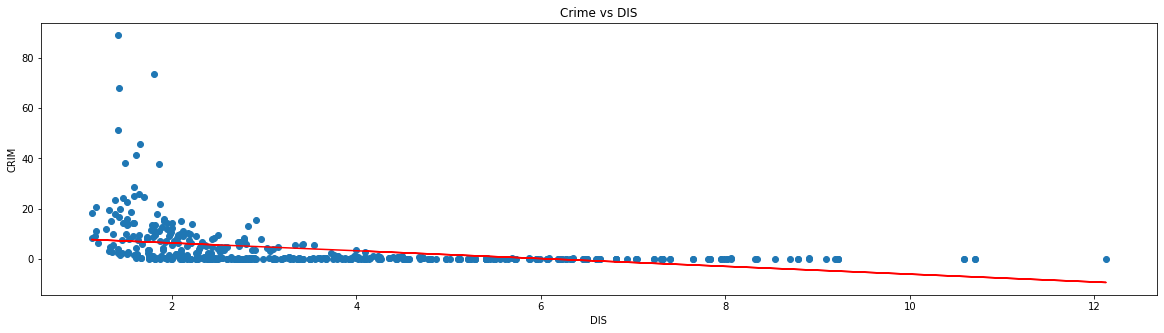

In [49]:
plt.figure(figsize=(20, 5))

features = ['DIS']
target = Boston['CRIM']
for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
x = Boston[col]
y = target
plt.scatter(x, y, marker='o')
plt.title('Crime vs DIS')
plt.xlabel(col)
plt.ylabel('CRIM')
plt.plot(X, linreg7.coef_ * X + linreg7.intercept_, 'r-')

In [50]:
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)
linreg = LinearRegression().fit(X_poly, Y)

print('(poly deg 3) linear model coeff (w):\n{}'
     .format(linreg.coef_))
print('(poly deg 3) linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('(poly deg 3) R-squared score (training): {:.3f}'
     .format(linreg.score(X_poly, Y)))

(poly deg 3) linear model coeff (w):
[  0.         -15.55435349   2.45207217  -0.11859864]
(poly deg 3) linear model intercept (b): 30.048
(poly deg 3) R-squared score (training): 0.278


In [51]:
X_dataset=pd.DataFrame(np.c_[Boston['DIS']], columns = ['DIS'])
y_dataset=Boston['CRIM']
X=X_dataset.iloc[:].values
y=y_dataset.iloc[:].values
import statsmodels.api as sm
poly = PolynomialFeatures(degree=3)
X_F1_poly = poly.fit_transform(X_dataset)
X_with_const=sm.add_constant(X_poly)
model=sm.OLS(endog=y,exog=X_with_const)
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     64.37
Date:                Sat, 18 Apr 2020   Prob (F-statistic):           3.14e-35
Time:                        18:28:10   Log-Likelihood:                -1724.0
No. Observations:                 506   AIC:                             3456.
Df Residuals:                     502   BIC:                             3473.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.0476      2.446     12.285      0.000      25.242      34.853
x1           -15.5544      1.736     -8.960      0.000     -18.965     -12.144
x2             2.4521      0.346      7.078      0.000       1.771       3.133
x3            -0.1186      0.020     -5.814      0.000      -0.159      -0.079
==============================================================================
Omnibus:                      577.742   Durbin-Watson:                   1.129
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            42444.706
Skew:                           5.305   Prob(JB):                         0.00
Kurtosis:                      46.596   Cond. No.                     2.10e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [52]:
X = pd.DataFrame(np.c_[Boston['RAD']], columns = ['RAD'])
Y = Boston['CRIM']
linreg8 = LinearRegression()
linreg8.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
print('linear model coeff (w): {}'
     .format(linreg8.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg8.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg8.score(X,Y)))

linear model coeff (w): [0.61791093]
linear model intercept (b): -2.287
R-squared score (training): 0.391


In [54]:
x = pd.DataFrame(np.c_[Boston['RAD']], columns = ['RAD'])
Y = Boston['CRIM']
X = x.iloc[:].values
y = Y.iloc[:].values
X_with_const=sm.add_constant(X)
model=sm.OLS(endog=y,exog=X_with_const)
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.391
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     323.9
Date:                Sat, 18 Apr 2020   Prob (F-statistic):           2.69e-56
Time:                        18:28:10   Log-Likelihood:                -1680.8
No. Observations:                 506   AIC:                             3366.
Df Residuals:                     504   BIC:                             3374.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.2872      0.443     -5.157      0.000      -3.158      -1.416
x1             0.6179      0.034     17.998      0.000       0.550       0.685
==============================================================================
Omnibus:                      656.459   Durbin-Watson:                   1.337
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            75417.007
Skew:                           6.478   Prob(JB):                         0.00
Kurtosis:                      61.389   Cond. No.                         19.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

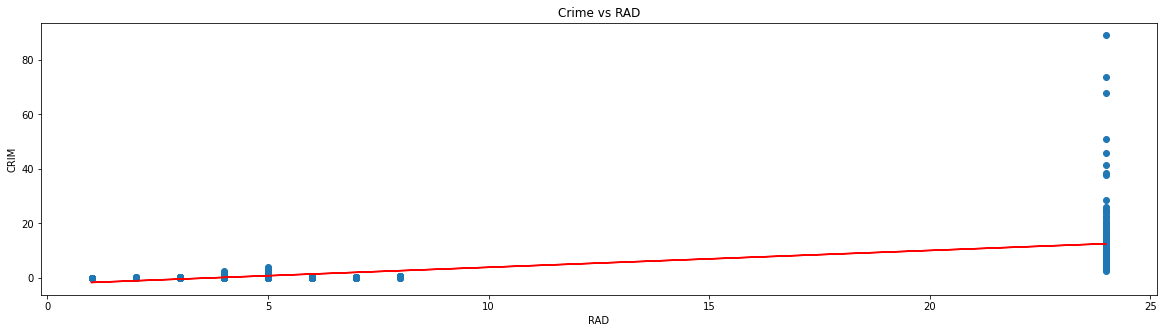

In [55]:
plt.figure(figsize=(20, 5))

features = ['RAD']
target = Boston['CRIM']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
x = Boston[col]
y = target
plt.scatter(x, y, marker='o')
plt.title('Crime vs RAD')
plt.xlabel(col)
plt.ylabel('CRIM')
plt.plot(X, linreg8.coef_ * X + linreg8.intercept_, 'r-')

In [56]:
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)
linreg = LinearRegression().fit(X_poly, Y)

print('(poly deg 3) linear model coeff (w):\n{}'
     .format(linreg.coef_))
print('(poly deg 3) linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('(poly deg 3) R-squared score (training): {:.3f}'
     .format(linreg.score(X_poly, Y)))

(poly deg 3) linear model coeff (w):
[ 0.          0.51273604 -0.07517736  0.003209  ]
(poly deg 3) linear model intercept (b): -0.606
(poly deg 3) R-squared score (training): 0.400


In [57]:
X_dataset=pd.DataFrame(np.c_[Boston['RAD']], columns = ['RAD'])
y_dataset=Boston['CRIM']
X=X_dataset.iloc[:].values
y=y_dataset.iloc[:].values
import statsmodels.api as sm
poly = PolynomialFeatures(degree=3)
X_F1_poly = poly.fit_transform(X_dataset)
X_with_const=sm.add_constant(X_poly)
model=sm.OLS(endog=y,exog=X_with_const)
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.400
Model:                            OLS   Adj. R-squared:                  0.396
Method:                 Least Squares   F-statistic:                     111.6
Date:                Sat, 18 Apr 2020   Prob (F-statistic):           2.31e-55
Time:                        18:28:10   Log-Likelihood:                -1677.1
No. Observations:                 506   AIC:                             3362.
Df Residuals:                     502   BIC:                             3379.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6055      2.050     -0.295      0.768      -4.633       3.422
x1             0.5127      1.044      0.491      0.623      -1.538       2.563
x2            -0.0752      0.149     -0.506      0.613      -0.367       0.217
x3             0.0032      0.005      0.703      0.482      -0.006       0.012
==============================================================================
Omnibus:                      659.751   Durbin-Watson:                   1.351
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            77838.247
Skew:                           6.526   Prob(JB):                         0.00
Kurtosis:                      62.343   Cond. No.                     5.43e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.43e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [58]:
X = pd.DataFrame(np.c_[Boston['TAX']], columns = ['TAX'])
Y = Boston['CRIM']
linreg9 = LinearRegression()
linreg9.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [59]:
print('linear model coeff (w): {}'
     .format(linreg9.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg9.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg9.score(X,Y)))

linear model coeff (w): [0.02974225]
linear model intercept (b): -8.528
R-squared score (training): 0.340


In [60]:
x = pd.DataFrame(np.c_[Boston['TAX']], columns = ['TAX'])
Y = Boston['CRIM']
X = x.iloc[:].values
y = Y.iloc[:].values
X_with_const=sm.add_constant(X)
model=sm.OLS(endog=y,exog=X_with_const)
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     259.2
Date:                Sat, 18 Apr 2020   Prob (F-statistic):           2.36e-47
Time:                        18:28:10   Log-Likelihood:                -1701.4
No. Observations:                 506   AIC:                             3407.
Df Residuals:                     504   BIC:                             3415.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.5284      0.816    -10.454      0.000     -10.131      -6.926
x1             0.0297      0.002     16.099      0.000       0.026       0.033
==============================================================================
Omnibus:                      635.377   Durbin-Watson:                   1.252
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            63763.835
Skew:                           6.156   Prob(JB):                         0.00
Kurtosis:                      56.599   Cond. No.                     1.16e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

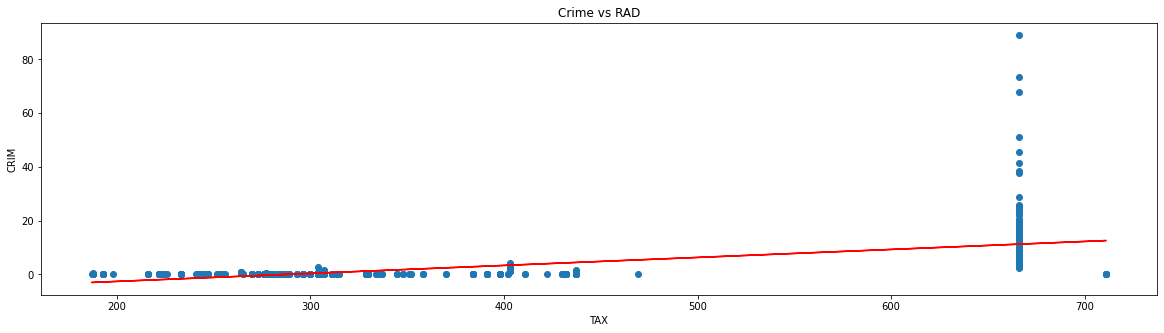

In [61]:
plt.figure(figsize=(20, 5))

features = ['TAX']
target = Boston['CRIM']
for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
x = Boston[col]
y = target
plt.scatter(x, y, marker='o')
plt.title('Crime vs RAD')
plt.xlabel(col)
plt.ylabel('CRIM')
plt.plot(X, linreg9.coef_ * X + linreg9.intercept_, 'r-')

In [62]:
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)
linreg = LinearRegression().fit(X_poly, Y)

print('(poly deg 3) linear model coeff (w):\n{}'
     .format(linreg.coef_))
print('(poly deg 3) linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('(poly deg 3) R-squared score (training): {:.3f}'
     .format(linreg.score(X_poly, Y)))

(poly deg 3) linear model coeff (w):
[ 0.00000000e+00 -1.53309613e-01  3.60826646e-04 -2.20371513e-07]
(poly deg 3) linear model intercept (b): 19.184
(poly deg 3) R-squared score (training): 0.369


In [63]:
X_dataset=pd.DataFrame(np.c_[Boston['TAX']], columns = ['TAX'])
y_dataset=Boston['CRIM']
X=X_dataset.iloc[:].values
y=y_dataset.iloc[:].values
poly = PolynomialFeatures(degree=3)
X_F1_poly = poly.fit_transform(X_dataset)
X_with_const=sm.add_constant(X_poly)
model=sm.OLS(endog=y,exog=X_with_const)
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.369
Model:                            OLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                     97.80
Date:                Sat, 18 Apr 2020   Prob (F-statistic):           7.34e-50
Time:                        18:28:11   Log-Likelihood:                -1689.9
No. Observations:                 506   AIC:                             3388.
Df Residuals:                     502   BIC:                             3405.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.1836     11.796      1.626      0.105      -3.991      42.358
x1            -0.1533      0.096     -1.602      0.110      -0.341       0.035
x2             0.0004      0.000      1.488      0.137      -0.000       0.001
x3         -2.204e-07   1.89e-07     -1.167      0.244   -5.91e-07    1.51e-07
==============================================================================
Omnibus:                      644.161   Durbin-Watson:                   1.293
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            69773.212
Skew:                           6.278   Prob(JB):                         0.00
Kurtosis:                      59.141   Cond. No.                     6.16e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.16e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [64]:
X = pd.DataFrame(np.c_[Boston['PTRATIO']], columns = ['PTRATIO'])
Y = Boston['CRIM']
linreg10 = LinearRegression()
linreg10.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [65]:
print('linear model coeff (w): {}'
     .format(linreg10.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg10.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg10.score(X,Y)))

linear model coeff (w): [1.15198279]
linear model intercept (b): -17.647
R-squared score (training): 0.084


In [66]:
x = pd.DataFrame(np.c_[Boston['PTRATIO']], columns = ['PTRATIO'])
Y = Boston['CRIM']
X = x.iloc[:].values
y = Y.iloc[:].values
X_with_const=sm.add_constant(X)
model=sm.OLS(endog=y,exog=X_with_const)
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     46.26
Date:                Sat, 18 Apr 2020   Prob (F-statistic):           2.94e-11
Time:                        18:28:11   Log-Likelihood:                -1784.1
No. Observations:                 506   AIC:                             3572.
Df Residuals:                     504   BIC:                             3581.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -17.6469      3.147     -5.607      0.000     -23.830     -11.464
x1             1.1520      0.169      6.801      0.000       0.819       1.485
==============================================================================
Omnibus:                      568.053   Durbin-Watson:                   0.905
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            34221.853
Skew:                           5.245   Prob(JB):                         0.00
Kurtosis:                      41.899   Cond. No.                         160.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

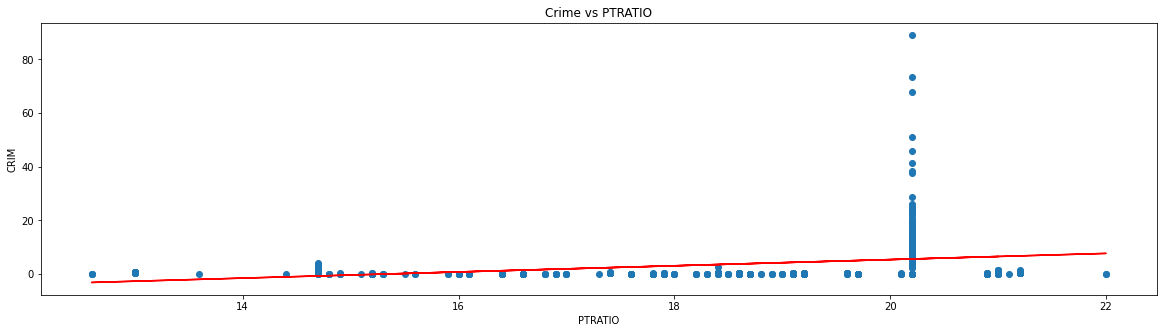

In [67]:
plt.figure(figsize=(20, 5))

features = ['PTRATIO']
target = Boston['CRIM']
for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
x = Boston[col]
y = target
plt.scatter(x, y, marker='o')
plt.title('Crime vs PTRATIO')
plt.xlabel(col)
plt.ylabel('CRIM')
plt.plot(X, linreg10.coef_ * X + linreg10.intercept_, 'r-')

In [68]:
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)
linreg = LinearRegression().fit(X_poly, Y)

print('(poly deg 3) linear model coeff (w):\n{}'
     .format(linreg.coef_))
print('(poly deg 3) linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('(poly deg 3) R-squared score (training): {:.3f}'
     .format(linreg.score(X_poly, Y)))

(poly deg 3) linear model coeff (w):
[  0.         -82.36053772   4.63534723  -0.08476032]
(poly deg 3) linear model intercept (b): 477.184
(poly deg 3) R-squared score (training): 0.114


In [69]:
X_dataset=pd.DataFrame(np.c_[Boston['PTRATIO']], columns = ['PTRATIO'])
y_dataset=Boston['CRIM']
X=X_dataset.iloc[:].values
y=y_dataset.iloc[:].values
import statsmodels.api as sm
poly = PolynomialFeatures(degree=3)
X_F1_poly = poly.fit_transform(X_dataset)
X_with_const=sm.add_constant(X_poly)
model=sm.OLS(endog=y,exog=X_with_const)
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     21.48
Date:                Sat, 18 Apr 2020   Prob (F-statistic):           4.17e-13
Time:                        18:28:11   Log-Likelihood:                -1775.8
No. Observations:                 506   AIC:                             3560.
Df Residuals:                     502   BIC:                             3577.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        477.1840    156.795      3.043      0.002     169.129     785.239
x1           -82.3605     27.644     -2.979      0.003    -136.673     -28.048
x2             4.6353      1.608      2.882      0.004       1.475       7.795
x3            -0.0848      0.031     -2.743      0.006      -0.145      -0.024
==============================================================================
Omnibus:                      572.356   Durbin-Watson:                   0.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            36070.763
Skew:                           5.294   Prob(JB):                         0.00
Kurtosis:                      42.985   Cond. No.                     3.02e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.02e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [70]:
X = pd.DataFrame(np.c_[Boston['B']], columns = ['B'])
Y = Boston['CRIM']
linreg11 = LinearRegression()
linreg11.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [71]:
print('linear model coeff (w): {}'
     .format(linreg11.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg11.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg11.score(X,Y)))

linear model coeff (w): [-0.03627964]
linear model intercept (b): 16.554
R-squared score (training): 0.148


In [72]:
x = pd.DataFrame(np.c_[Boston['B']], columns = ['B'])
Y = Boston['CRIM']
X = x.iloc[:].values
y = Y.iloc[:].values
X_with_const=sm.add_constant(X)
model=sm.OLS(endog=y,exog=X_with_const)
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     87.74
Date:                Sat, 18 Apr 2020   Prob (F-statistic):           2.49e-19
Time:                        18:28:11   Log-Likelihood:                -1765.8
No. Observations:                 506   AIC:                             3536.
Df Residuals:                     504   BIC:                             3544.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.5535      1.426     11.609      0.000      13.752      19.355
x1            -0.0363      0.004     -9.367      0.000      -0.044      -0.029
==============================================================================
Omnibus:                      594.029   Durbin-Watson:                   0.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            44041.935
Skew:                           5.578   Prob(JB):                         0.00
Kurtosis:                      47.323   Cond. No.                     1.49e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

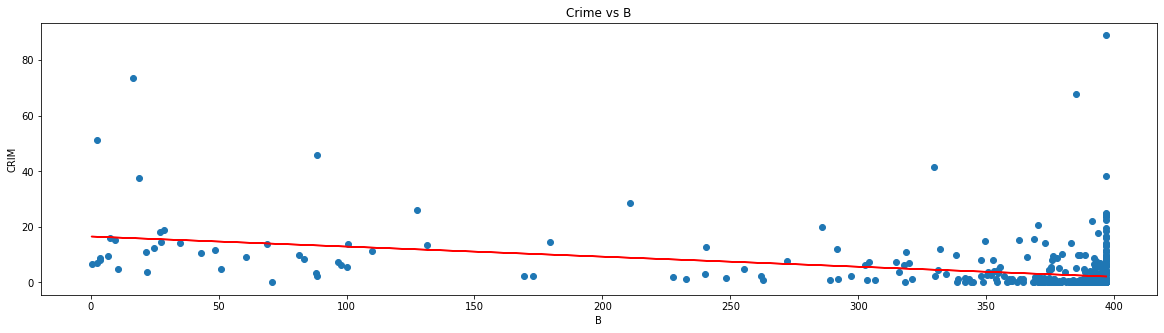

In [73]:
plt.figure(figsize=(20, 5))

features = ['B']
target = Boston['CRIM']
for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
x = Boston[col]
y = target
plt.scatter(x, y, marker='o')
plt.title('Crime vs B')
plt.xlabel(col)
plt.ylabel('CRIM')
plt.plot(X, linreg11.coef_ * X + linreg11.intercept_, 'r-')

In [74]:
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)
linreg = LinearRegression().fit(X_poly, Y)

print('(poly deg 3) linear model coeff (w):\n{}'
     .format(linreg.coef_))
print('(poly deg 3) linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('(poly deg 3) R-squared score (training): {:.3f}'
     .format(linreg.score(X_poly, Y)))

(poly deg 3) linear model coeff (w):
[ 0.00000000e+00 -8.35580475e-02  2.13740369e-04 -2.65245331e-07]
(poly deg 3) linear model intercept (b): 18.264
(poly deg 3) R-squared score (training): 0.150


In [75]:
X_dataset=pd.DataFrame(np.c_[Boston['B']], columns = ['B'])
y_dataset=Boston['CRIM']
X=X_dataset.iloc[:].values
y=y_dataset.iloc[:].values
import statsmodels.api as sm
poly = PolynomialFeatures(degree=3)
X_F1_poly = poly.fit_transform(X_dataset)
X_with_const=sm.add_constant(X_poly)
model=sm.OLS(endog=y,exog=X_with_const)
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.150
Model:                            OLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                     29.49
Date:                Sat, 18 Apr 2020   Prob (F-statistic):           1.41e-17
Time:                        18:28:12   Log-Likelihood:                -1765.3
No. Observations:                 506   AIC:                             3539.
Df Residuals:                     502   BIC:                             3555.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.2637      2.305      7.924      0.000      13.735      22.792
x1            -0.0836      0.056     -1.483      0.139      -0.194       0.027
x2             0.0002      0.000      0.716      0.474      -0.000       0.001
x3         -2.652e-07   4.36e-07     -0.608      0.544   -1.12e-06    5.92e-07
==============================================================================
Omnibus:                      591.816   Durbin-Watson:                   0.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            43468.746
Skew:                           5.544   Prob(JB):                         0.00
Kurtosis:                      47.032   Cond. No.                     3.59e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.59e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [76]:
X = pd.DataFrame(np.c_[Boston['LSTAT']], columns = ['LSTAT'])
Y = Boston['CRIM']
linreg12 = LinearRegression()
linreg12.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [77]:
print('linear model coeff (w): {}'
     .format(linreg12.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg12.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg12.score(X,Y)))

linear model coeff (w): [0.54880478]
linear model intercept (b): -3.331
R-squared score (training): 0.208


In [78]:
x = pd.DataFrame(np.c_[Boston['LSTAT']], columns = ['LSTAT'])
Y = Boston['CRIM']
X = x.iloc[:].values
y = Y.iloc[:].values
X_with_const=sm.add_constant(X)
model=sm.OLS(endog=y,exog=X_with_const)
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.206
Method:                 Least Squares   F-statistic:                     132.0
Date:                Sat, 18 Apr 2020   Prob (F-statistic):           2.65e-27
Time:                        18:28:12   Log-Likelihood:                -1747.5
No. Observations:                 506   AIC:                             3499.
Df Residuals:                     504   BIC:                             3507.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.3305      0.694     -4.801      0.000      -4.694      -1.968
x1             0.5488      0.048     11.491      0.000       0.455       0.643
==============================================================================
Omnibus:                      601.306   Durbin-Watson:                   1.182
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            49918.826
Skew:                           5.645   Prob(JB):                         0.00
Kurtosis:                      50.331   Cond. No.                         29.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

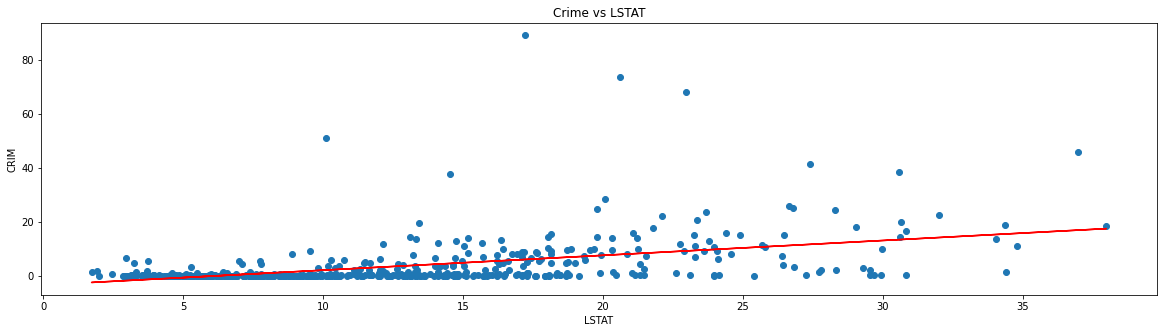

In [79]:
plt.figure(figsize=(20, 5))

features = ['LSTAT']
target = Boston['CRIM']
for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
x = Boston[col]
y = target
plt.scatter(x, y, marker='o')
plt.title('Crime vs LSTAT')
plt.xlabel(col)
plt.ylabel('CRIM')
plt.plot(X, linreg12.coef_ * X + linreg12.intercept_, 'r-')

In [80]:
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)
linreg = LinearRegression().fit(X_poly, Y)

print('(poly deg 3) linear model coeff (w):\n{}'
     .format(linreg.coef_))
print('(poly deg 3) linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('(poly deg 3) R-squared score (training): {:.3f}'
     .format(linreg.score(X_poly, Y)))

(poly deg 3) linear model coeff (w):
[ 0.         -0.44906559  0.05577942 -0.00085737]
(poly deg 3) linear model intercept (b): 1.201
(poly deg 3) R-squared score (training): 0.218


In [81]:
X_dataset=pd.DataFrame(np.c_[Boston['LSTAT']], columns = ['LSTAT'])
y_dataset=Boston['CRIM']
X=X_dataset.iloc[:].values
y=y_dataset.iloc[:].values
import statsmodels.api as sm
poly = PolynomialFeatures(degree=3)
X_F1_poly = poly.fit_transform(X_dataset)
X_with_const=sm.add_constant(X_poly)
model=sm.OLS(endog=y,exog=X_with_const)
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     46.63
Date:                Sat, 18 Apr 2020   Prob (F-statistic):           1.35e-26
Time:                        18:28:12   Log-Likelihood:                -1744.2
No. Observations:                 506   AIC:                             3496.
Df Residuals:                     502   BIC:                             3513.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2010      2.029      0.592      0.554      -2.785       5.187
x1            -0.4491      0.465     -0.966      0.335      -1.362       0.464
x2             0.0558      0.030      1.852      0.065      -0.003       0.115
x3            -0.0009      0.001     -1.517      0.130      -0.002       0.000
==============================================================================
Omnibus:                      607.734   Durbin-Watson:                   1.239
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            53621.219
Skew:                           5.726   Prob(JB):                         0.00
Kurtosis:                      52.114   Cond. No.                     5.20e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.2e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [82]:
x = pd.DataFrame(np.c_[Boston['ZN'],Boston['INDUS'],Boston['CHAS'],Boston['NOX'],Boston['RM'],Boston['AGE'],Boston['DIS'],Boston['RAD'],Boston['TAX'],Boston['PTRATIO'],Boston['B'],Boston['LSTAT']], columns = ['ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT'])
Y = Boston['CRIM']
X = x.iloc[:].values
y = Y.iloc[:].values


In [83]:
import statsmodels.api as sm

X_with_const=sm.add_constant(X)
model=sm.OLS(endog=y,exog=X_with_const)
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.442
Model:                            OLS   Adj. R-squared:                  0.428
Method:                 Least Squares   F-statistic:                     32.55
Date:                Sat, 18 Apr 2020   Prob (F-statistic):           4.84e-55
Time:                        18:28:12   Log-Likelihood:                -1658.8
No. Observations:                 506   AIC:                             3344.
Df Residuals:                     493   BIC:                             3398.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.9967      6.979      1.432      0.153      -3.716      23.709
x1             0.0364      0.019      1.943      0.053      -0.000       0.073
x2            -0.0694      0.084     -0.825      0.410      -0.235       0.096
x3            -1.3117      1.179     -1.112      0.267      -3.629       1.005
x4            -6.9288      5.225     -1.326      0.185     -17.195       3.338
x5            -0.3348      0.573     -0.585      0.559      -1.460       0.790
x6             0.0013      0.018      0.074      0.941      -0.034       0.037
x7            -0.7089      0.271     -2.612      0.009      -1.242      -0.176
x8             0.5389      0.088      6.151      0.000       0.367       0.711
x9            -0.0014      0.005     -0.263      0.793      -0.011       0.009
x10           -0.0834      0.179     -0.465      0.642      -0.436       0.269
x11           -0.0096      0.004     -2.625      0.009      -0.017      -0.002
x12            0.2356      0.069      3.431      0.001       0.101       0.371
==============================================================================
Omnibus:                      685.174   Durbin-Watson:                   1.511
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            97204.794
Skew:                           6.921   Prob(JB):                         0.00
Kurtosis:                      69.475   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [86]:
pred=[]
for x in Boston['CRIM']:
    if x>median(Boston['CRIM']):
        pred.append(1)
    else:
        pred.append(0)
pred=np.array(pred)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [87]:
X = pd.DataFrame(np.c_[Boston['ZN'],Boston['INDUS'],Boston['CHAS'],Boston['NOX'],Boston['RM'],Boston['AGE'],Boston['DIS'],Boston['RAD'],Boston['TAX'],Boston['PTRATIO'],Boston['B'],Boston['LSTAT']], columns = ['ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT'])
Y = Boston['CRIM']
linreg = LinearRegression()
linreg.fit(X,Y)
y_values=list(linreg.coef_)
y_values
cv_scores = cross_val_score(linreg, X, pred,cv=3)    
print('Cross-validation scores (3-fold):', cv_scores)
print('Mean cross-validation score (3-fold): {:.3f}'.format(np.mean(cv_scores)))

Cross-validation scores (3-fold): [ 0.24899131  0.10353542 -2.26230545]
Mean cross-validation score (3-fold): -0.637


In [88]:
x_values=[linreg1.coef_[0],linreg2.coef_[0],linreg3.coef_[0],linreg4.coef_[0],linreg5.coef_[0],linreg6.coef_[0],linreg7.coef_[0],linreg8.coef_[0],linreg9.coef_[0],linreg10.coef_[0],linreg11.coef_[0],linreg12.coef_[0]]
x_values

[-0.07393497740412351,
 0.5097763311042315,
 -1.8927765508037606,
 31.248531201122912,
 -2.684051224113947,
 0.10778622713953306,
 -1.5509016824100992,
 0.6179109273272013,
 0.02974225282276536,
 1.1519827870705859,
 -0.03627964056733074,
 0.548804782062398]

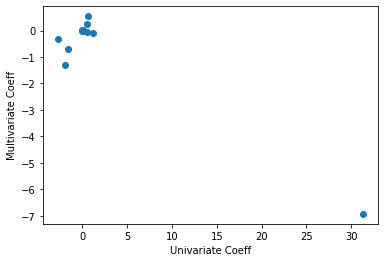

In [89]:
plt.xlabel('Univariate Coeff') 
plt.ylabel('Multivariate Coeff')
plt.scatter(x_values,y_values)

In [90]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
linridge = Ridge(alpha=20.0).fit(X_scaled, Y)
print('Crime dataset')
print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge.coef_))
print('R-squared score: {:.3f}'
     .format(linridge.score(X_scaled, Y)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))

Crime dataset
ridge regression linear model intercept: 3.6135235573122593
ridge regression linear model coeff:
[ 0.71370374 -0.54992707 -0.30190768 -0.53642064 -0.17559348  0.05488359
 -1.25370474  3.81695983  0.5182404  -0.0777326  -0.89464956  1.57101183]
R-squared score: 0.440
Number of non-zero features: 12


In [91]:
X_scaled.shape

(506, 12)

In [92]:
print('Ridge regression: effect of alpha regularization parameter\n')
for this_alpha in [0, 1, 10, 20, 50, 100, 1000]:
    linridge = Ridge(alpha = this_alpha).fit(X_scaled, Y)
    r2 = linridge.score(X_scaled, Y)
    num_coeff_bigger = np.sum(abs(linridge.coef_) > 1.0)
    print('Alpha = {:.2f}\nnum abs(coeff) > 1.0: {}, \r-squared: {:.3f}'
         .format(this_alpha, num_coeff_bigger, r2))
    cv_scores = cross_val_score(linridge, X, pred,cv=3)    
    print('Cross-validation scores (3-fold):', cv_scores)
    print('Mean cross-validation score (3-fold): {:.3f}'.format(np.mean(cv_scores)))

Ridge regression: effect of alpha regularization parameter

Alpha = 0.00
-squared: 0.442
Cross-validation scores (3-fold): [ 0.24899131  0.10353542 -2.26230545]
Mean cross-validation score (3-fold): -0.637
Alpha = 1.00
-squared: 0.442
Cross-validation scores (3-fold): [ 0.18997608  0.12462615 -3.1083706 ]
Mean cross-validation score (3-fold): -0.931
Alpha = 10.00
-squared: 0.441
Cross-validation scores (3-fold): [ 0.14495719  0.14325884 -3.7986975 ]
Mean cross-validation score (3-fold): -1.170
Alpha = 20.00
-squared: 0.440
Cross-validation scores (3-fold): [ 0.14139577  0.15241921 -3.76807064]
Mean cross-validation score (3-fold): -1.158
Alpha = 50.00
-squared: 0.436
Cross-validation scores (3-fold): [ 0.14197445  0.16417435 -3.48580496]
Mean cross-validation score (3-fold): -1.060
Alpha = 100.00
-squared: 0.428
Cross-validation scores (3-fold): [ 0.14702469  0.17203769 -3.0134627 ]
Mean cross-validation score (3-fold): -0.898
Alpha = 1000.00
-squared: 0.349
Cross-validation scores (3-

In [94]:
linlasso = Lasso(alpha=2.0, max_iter = 10000).fit(X_scaled, Y)
print('Crime dataset')
print('lasso regression linear model intercept: {}'
     .format(linlasso.intercept_))
print('lasso regression linear model coeff:\n{}'
     .format(linlasso.coef_))
print('Non-zero features: {}'
     .format(np.sum(linlasso.coef_ != 0)))
print('R-squared score: {:.3f}'
     .format(linlasso.score(X_scaled, Y)))
print('Features with non-zero weight (sorted by absolute magnitude):')

Crime dataset
lasso regression linear model intercept: 3.613523557312254
lasso regression linear model coeff:
[-0.          0.         -0.          0.         -0.          0.
 -0.          3.20435264  0.          0.         -0.          0.34928291]
Non-zero features: 2
R-squared score: 0.348
Features with non-zero weight (sorted by absolute magnitude):


In [95]:
print('Lasso regression: effect of alpha regularization\n\
parameter on number of features kept in final model\n')

for alpha in [0.1, 0.5, 1, 2, 3, 5, 10, 20, 50]:
    linlasso = Lasso(alpha, max_iter = 10000).fit(X_scaled, Y)
    r2 = linlasso.score(X_scaled, Y)
    print('Alpha = {:.2f}\nFeatures kept: {}, r-squared: {:.3f}\n'
         .format(alpha, np.sum(linlasso.coef_ != 0), r2))
    cv_scores = cross_val_score(linlasso, X, pred,cv=3)    
    print('Cross-validation scores (3-fold):', cv_scores)
    print('Mean cross-validation score (3-fold): {:.3f}'.format(np.mean(cv_scores)))   

Lasso regression: effect of alpha regularization
parameter on number of features kept in final model

Alpha = 0.10
Features kept: 8, r-squared: 0.438

Cross-validation scores (3-fold): [0.23662752 0.18760789 0.31250794]
Mean cross-validation score (3-fold): 0.246
Alpha = 0.50
Features kept: 3, r-squared: 0.423

Cross-validation scores (3-fold): [0.33882575 0.17217251 0.3528975 ]
Mean cross-validation score (3-fold): 0.288
Alpha = 1.00
Features kept: 3, r-squared: 0.407

Cross-validation scores (3-fold): [0.33145902 0.15879609 0.44946575]
Mean cross-validation score (3-fold): 0.313
Alpha = 2.00
Features kept: 2, r-squared: 0.348

Cross-validation scores (3-fold): [0.29823786 0.12396299 0.56569459]
Mean cross-validation score (3-fold): 0.329
Alpha = 3.00
Features kept: 1, r-squared: 0.269

Cross-validation scores (3-fold): [0.23961121 0.05611321 0.59017112]
Mean cross-validation score (3-fold): 0.295
Alpha = 5.00
Features kept: 1, r-squared: 0.053

Cross-validation scores (3-fold): [ 1.6

In [96]:
print("Median of CRIME is % s" % (median(Boston['CRIM'])))

Median of CRIME is 0.25651


In [97]:
from sklearn.linear_model import LogisticRegression


clf = LogisticRegression(solver='lbfgs').fit(X, pred)
title = 'Logistic regression, simple synthetic dataset C = {:.3f}'.format(1.0)

print('Accuracy of Logistic regression classifier: {:.2f}'
     .format(clf.score(X, pred)))

Accuracy of Logistic regression classifier: 0.85


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [98]:
clf = LogisticRegression(solver='lbfgs').fit(X, pred)
cv_scores = cross_val_score(clf, X, pred,cv=3)

print('Cross-validation scores (3-fold):', cv_scores)
print('Mean cross-validation score (3-fold): {:.3f}'
     .format(np.mean(cv_scores)))
print('Boston Crime')
print('Accuracy of Logistic regression classifier: {:.3f}'
     .format(clf.score(X, pred)))

Cross-validation scores (3-fold): [0.64117647 0.73214286 0.93452381]
Mean cross-validation score (3-fold): 0.769
Boston Crime
Accuracy of Logistic regression classifier: 0.854


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [99]:
from sklearn.neighbors import KNeighborsRegressor

knnreg = KNeighborsRegressor(n_neighbors = 5).fit(X, pred)

print('R-squared test score: {:.3f}'
     .format(knnreg.score(X, pred)))

R-squared test score: 0.847


In [100]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier


clf = KNeighborsClassifier(n_neighbors = 5)
cv_scores = cross_val_score(clf, X, pred,cv=3)

print('Cross-validation scores (3-fold):', cv_scores)
print('Mean cross-validation score (3-fold): {:.3f}'
     .format(np.mean(cv_scores)))

Cross-validation scores (3-fold): [0.62352941 0.79166667 0.94047619]
Mean cross-validation score (3-fold): 0.785


In [101]:
from sklearn.naive_bayes import GaussianNB
nbclf = GaussianNB().fit(X, pred)
print('Boston Crime')
print('Accuracy of GaussianNB classifier on data set: {:.2f}'
     .format(nbclf.score(X, pred)))
cv_scores = cross_val_score(clf, X, pred,cv=3)

print('Cross-validation scores (3-fold):', cv_scores)
print('Mean cross-validation score (3-fold): {:.3f}'
     .format(np.mean(cv_scores)))

Boston Crime
Accuracy of GaussianNB classifier on data set: 0.83
Cross-validation scores (3-fold): [0.62352941 0.79166667 0.94047619]
Mean cross-validation score (3-fold): 0.785
